# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [3]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

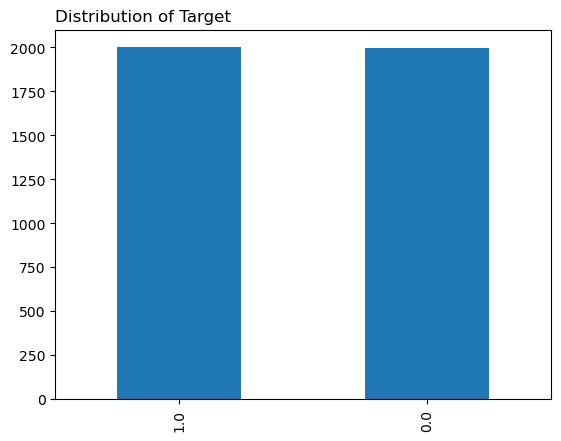

In [6]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df, columns=['var0', 'var1', 'var2'])# used one-hot encoding since these are of object datatype
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49	var0_a	var0_b	var0_c	var1_d	var1_e	var1_f	var2_g	var2_h	var2_i


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

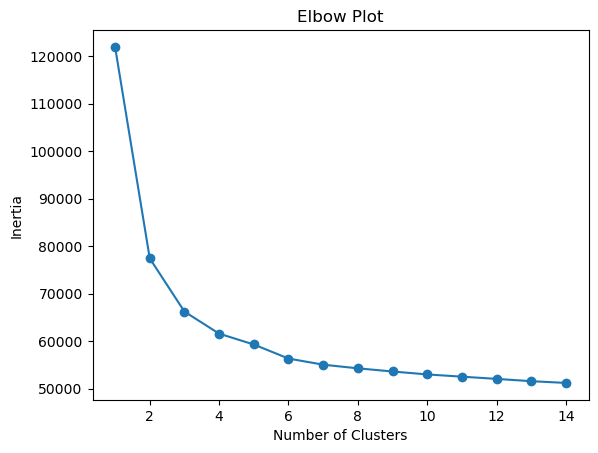

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

distortions = list()
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, n_init='auto', random_state=0)
    kmeans.fit(X_train)
    distortions.append(kmeans.inertia_)

# plot the elbow curve
plt.plot(range(1, 15), distortions, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


- Based on the plot, we can see that the elbow point is at around 5 clusters. Therefore, we can use 5 clusters as the optimum number of clusters for this data.

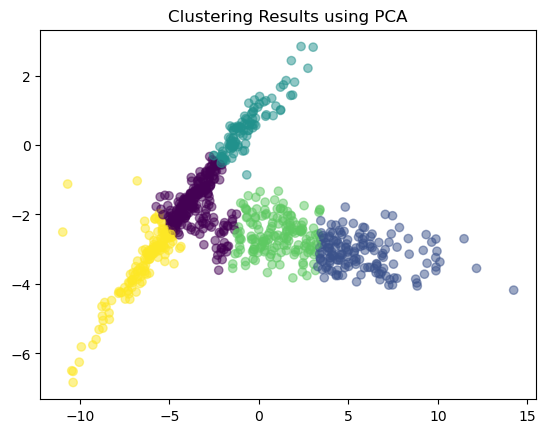

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=5))
])


pipeline.fit(X_train)
y_pred = pipeline.predict(X_test)


X_pca = pipeline.named_steps['pca'].transform(X_test)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, alpha=0.5)
plt.title('Clustering Results using PCA')
plt.show()


> We can see there is some overlap between clusters. Which can be enchanced if we use other clustering algorithms

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

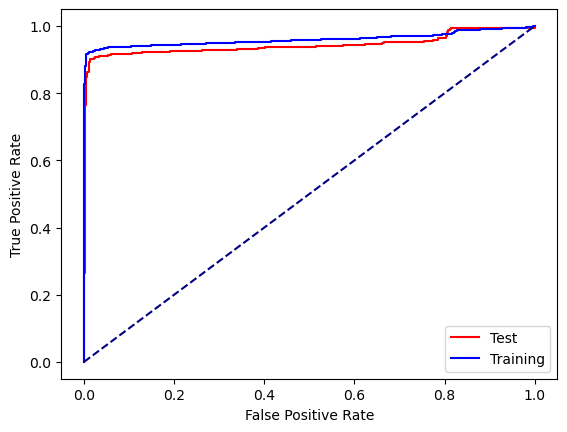

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

hyperparameters = {
    'logreg__C': [0.1, 1, 10], # regularization strength
}
grid_search = GridSearchCV(pipeline, hyperparameters)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


y_prob_test = grid_search.predict_proba(X_test)[:, 1]
y_prob_train = grid_search.predict_proba(X_train)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc = roc_auc_score(y_test, y_prob_test)

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [32]:
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'AUC: {auc:.3f}')

Accuracy: 0.925
Precision: 0.989
Recall: 0.862
AUC: 0.943


- these metrics indicate that the model has good performance, with high accuracy and precision, and reasonable recall.
- Good AUC score indicates madel can distinguish between positive and negative instances well.
- ROC curve shows that model has high true positive rate and low false positive rate 

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

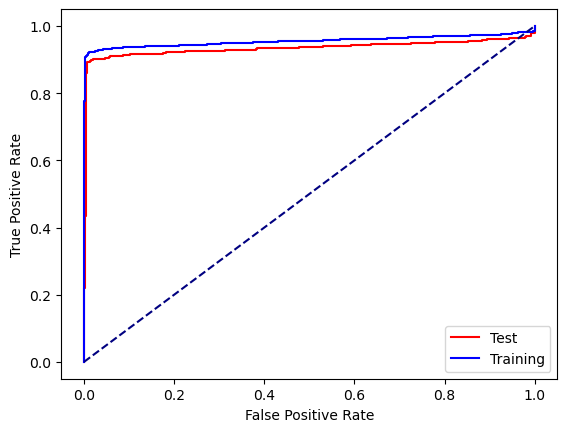

In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

hyperparameters = {
    'pca__n_components': [5, 10, 20, 30, 40, 50],
    'logreg__C': [0.1, 1, 10], # regularization strength
}
grid_search = GridSearchCV(pipeline, hyperparameters)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


y_prob_test = best_model.predict_proba(X_test)[:, 1]
y_prob_train = best_model.predict_proba(X_train)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc = roc_auc_score(y_test, y_prob_test)

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [35]:
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'AUC: {auc:.3f}')

Accuracy: 0.930
Precision: 0.992
Recall: 0.869
AUC: 0.933


- After using PCA there is slight increase in the performance of the model.

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

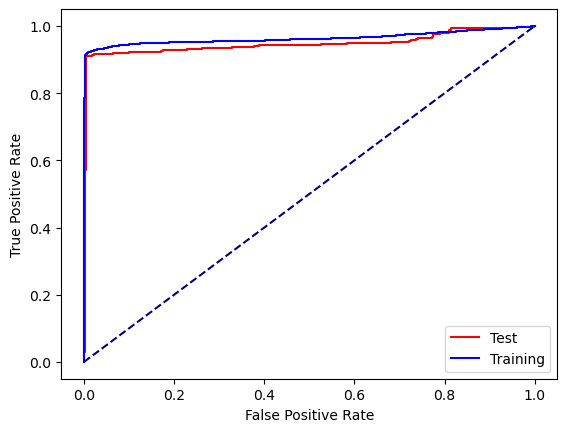

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans()
pipeline = Pipeline([
    ('kmeans', kmeans),
    ('logreg', LogisticRegression())
])

hyperparameters = {
    'kmeans__n_clusters': [2, 3, 4, 5],
    'logreg__C': [0.1, 1, 10], # regularization strength
}
grid_search = GridSearchCV(pipeline, hyperparameters)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


y_prob_test = best_model.predict_proba(X_test)[:, 1]
y_prob_train = best_model.predict_proba(X_train)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc = roc_auc_score(y_test, y_prob_test)

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [44]:
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'AUC: {auc:.3f}')

Accuracy: 0.943
Precision: 0.995
Recall: 0.892
AUC: 0.947


- With using K-means as preprocessor the AUC value improved thus model is good

In [42]:
print(grid_search.best_params_)

{'kmeans__n_clusters': 5, 'logreg__C': 10}


# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

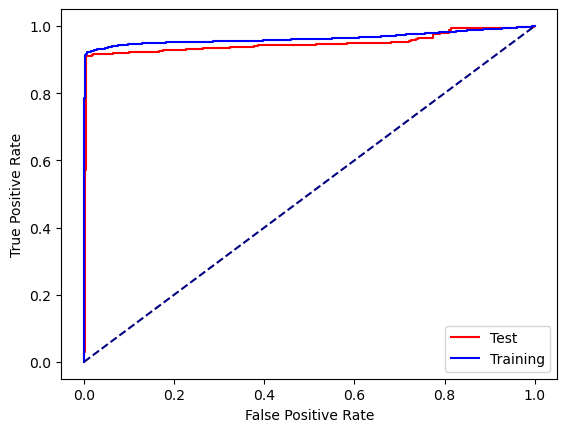

In [45]:
from sklearn.cluster import KMeans
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=5)),
    ('logreg', LogisticRegression(C=10))
])#pipeline with best parameters

grid_search = GridSearchCV(pipeline, hyperparameters)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


y_prob_test = best_model.predict_proba(X_test)[:, 1]
y_prob_train = best_model.predict_proba(X_train)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
auc = roc_auc_score(y_test, y_prob_test)

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [46]:
print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'AUC: {auc:.3f}')

Accuracy: 0.943
Precision: 0.995
Recall: 0.892
AUC: 0.947


- With using the Best parameters with K-means preprocessor we got the best AUC score hence it is the preferred model